In [1]:
# Here is imports for the linear regression model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn import metrics
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import FunctionTransformer
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
import re
from scipy.stats import skew
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import svm
from scipy.stats import uniform
from sklearn.calibration import CalibratedClassifierCV

<h3>Insights into the Dataframe</h3>

In [2]:
# Save the data into a dataframe
df = pd.read_csv("laptopData.csv")

In [3]:
# Show the head of the dataframe (first 5 rows)
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
# Show the tail of the dataframe (last 5 rows)
df.tail()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1298,1298.0,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.64
1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.72
1300,1300.0,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.12
1301,1301.0,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.92
1302,1302.0,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.32


There are 1303 rows in total

In [5]:
# Describe the dataframe
df.describe()

,Unnamed: 0,Price
count,1273.000000,1273.000000
mean,652.674784,59955.814073
std,376.493027,37332.251005
min,0.000000,9270.720000
25%,327.000000,31914.720000
50%,652.000000,52161.120000
75%,980.000000,79333.387200
max,1302.000000,324954.720000


In [6]:
# Show data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1273 non-null   float64
 1   Company           1273 non-null   object 
 2   TypeName          1273 non-null   object 
 3   Inches            1273 non-null   object 
 4   ScreenResolution  1273 non-null   object 
 5   Cpu               1273 non-null   object 
 6   Ram               1273 non-null   object 
 7   Memory            1273 non-null   object 
 8   Gpu               1273 non-null   object 
 9   OpSys             1273 non-null   object 
 10  Weight            1273 non-null   object 
 11  Price             1273 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


In [7]:
# Get the name of all the columns (already in the df.info but this we can get when needed)
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [8]:
# Get the shape of the dataframe (rows and columns)
df.shape

(1303, 12)

In [9]:
# Create a for loop to go through each column and all the value counts, this way it's easier to see ->
# all the value_counts for each column without necessaryly printing each separately-
for i in df.columns:
    x = df[i].value_counts()
    print(f"Column: {x}")

Column: Unnamed: 0
1302.0    1
0.0       1
1.0       1
2.0       1
3.0       1
         ..
13.0      1
12.0      1
11.0      1
10.0      1
9.0       1
Name: count, Length: 1273, dtype: int64
Column: Company
Lenovo       290
Dell         287
HP           266
Asus         156
Acer         103
MSI           53
Toshiba       47
Apple         21
Samsung        9
Mediacom       7
Razer          7
Microsoft      6
Vero           4
Xiaomi         4
Chuwi          3
LG             3
Google         3
Huawei         2
Fujitsu        2
Name: count, dtype: int64
Column: TypeName
Notebook              710
Gaming                203
Ultrabook             191
2 in 1 Convertible    116
Workstation            29
Netbook                24
Name: count, dtype: int64
Column: Inches
15.6    640
14      192
17.3    162
13.3    161
12.5     38
11.6     31
12        6
13.9      6
13.5      5
12.3      5
15.4      4
15        4
10.1      3
35.6      3
13        2
24        2
18.4      1
27.3      1
25.6      1
33

<h3>Dataset Cleaning</h3>

In [10]:
# Check for null/missing values within the dataframe
null_df = df[df.isna().any(axis=1)]

# Display the null dataframe
null_df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Since all the values on the rows are NaN, and there are only 30 rows from 1303, these can be dropped

In [11]:
# Drop the missing values
df = df.dropna(axis=0, how="any")

# Reset the index of the dataframe after dropping rows containing NaN values
df = df.reset_index(drop=True)

# Display the dataframe
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1268,1298.0,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1269,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1270,1300.0,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1271,1301.0,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [12]:
# Check that all NaN values were deleted from the dataframe 
df.isna().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

30 rows with missing values were deleted without complications

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
# Display the duplicates within the dataframe in a new dataframe created for duplicates
duplicated_df = df[df.duplicated(keep=False)]

# Display the duplicated dataframe
duplicated_df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price


In [15]:
df['Unnamed: 0'].value_counts()

Unnamed: 0
1302.0    1
0.0       1
1.0       1
2.0       1
3.0       1
         ..
13.0      1
12.0      1
11.0      1
10.0      1
9.0       1
Name: count, Length: 1273, dtype: int64

This seems to be a index variable, we can delete this since we already have index from pandas library. This is done for dataset cleaning and also that it doesn't confuse later on.

In [16]:
# Remove Unnamed: 0 column if it exists to avoid confusion and we don't need other index columns, since we have pandas
df = df.drop(columns=["Unnamed: 0"], axis=0)

In [17]:
# Display the changed made to the dataframe
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1268,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1269,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1270,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1271,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [18]:
# Identify rows where either 'Memory' or 'Inches' column has a '?'
mask = (df['Memory'] == '?') | (df['Inches'] == '?') | (df['Weight'] == '?')

# Drop those rows
df = df[~mask]


<h2>Optimization for basic visualization</h2>

In [19]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1268,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1269,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1270,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1271,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [20]:
# Split Memory into two parts if there are multiple storage types
df[["Primary_Storage", "Secondary_Storage"]] = df["Memory"].str.split(" \+ ", expand=True, n=1)

# Display the Primary_Storage value counts to see all the different primary storage types
df['Primary_Storage'].value_counts()

Primary_Storage
256GB SSD              485
1TB HDD                218
128GB SSD              168
512GB SSD              136
500GB HDD              130
32GB Flash Storage      37
2TB HDD                 16
64GB Flash Storage      15
1TB SSD                 15
1.0TB Hybrid             9
256GB Flash Storage      8
16GB Flash Storage       7
32GB SSD                 6
128GB Flash Storage      4
180GB SSD                4
16GB SSD                 3
512GB Flash Storage      2
64GB SSD                 1
32GB HDD                 1
128GB HDD                1
240GB SSD                1
8GB SSD                  1
508GB Hybrid             1
1.0TB HDD                1
Name: count, dtype: int64

In [21]:
# Function to check if storage contains TB or GB and convert size 
def convert_storage_to_gb(storage):
    if pd.notna(storage):
        storage = storage.strip().upper()
        if "TB" in storage:
            size = float(storage.split("TB")[0].strip()) * 1024
            return int(size)  # convert to int here
        elif "GB" in storage:
            size = float(storage.split("GB")[0].strip())
            return int(size)  # convert to int here
    return 0  # return int 0 instead of float 0.0


# Apply conversion to Primary and Secondary Storage
df["Primary_Size(GB)"] = df["Primary_Storage"].apply(convert_storage_to_gb)
df["Secondary_Size(GB)"] = df["Secondary_Storage"].apply(convert_storage_to_gb)

In [22]:
# Display the secondary storage value counts 
df['Secondary_Storage'].value_counts()

Secondary_Storage
1TB HDD         181
2TB HDD          15
256GB SSD         3
500GB HDD         2
1.0TB Hybrid      2
512GB SSD         1
Name: count, dtype: int64

Let's fill them with no secondary storage

In [23]:
df['Secondary_Storage'] = df['Secondary_Storage'].fillna('No Secondary Storage')

In [24]:
# Display the updated dataframe with new memorytype columns
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Primary_Storage,Secondary_Storage,Primary_Size(GB),Secondary_Size(GB)
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,128GB SSD,No Secondary Storage,128,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,128GB Flash Storage,No Secondary Storage,128,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,256GB SSD,No Secondary Storage,256,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,512GB SSD,No Secondary Storage,512,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,256GB SSD,No Secondary Storage,256,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,128GB SSD,No Secondary Storage,128,0
1269,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,512GB SSD,No Secondary Storage,512,0
1270,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200,64GB Flash Storage,No Secondary Storage,64,0
1271,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200,1TB HDD,No Secondary Storage,1024,0


In [25]:
# Split ScreenResolution into Width, Height, and Panel type
df['Panel_type'] = df['ScreenResolution'].str.replace(r'\d{3,5}x\d{3,5}', '', regex=True).str.strip()

# Fill Colums with NaN or otherwise odd values in 'Panel_type' with 'Not Specified'
df['Panel_type'] = df['Panel_type'].replace(r'^\s*$', 'Not Specified', regex=True)

In [26]:
# Display the head of the dataframe
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Primary_Storage,Secondary_Storage,Primary_Size(GB),Secondary_Size(GB),Panel_type
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,128GB SSD,No Secondary Storage,128,0,IPS Panel Retina Display
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,128GB Flash Storage,No Secondary Storage,128,0,Not Specified
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,256GB SSD,No Secondary Storage,256,0,Full HD
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,512GB SSD,No Secondary Storage,512,0,IPS Panel Retina Display
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,256GB SSD,No Secondary Storage,256,0,IPS Panel Retina Display


In [27]:
# Get Panel_type value counts to see all the different values within the Panel_type column
df['Panel_type'].value_counts()

Panel_type
Full HD                                492
Not Specified                          307
IPS Panel Full HD                      231
IPS Panel Full HD / Touchscreen         52
Full HD / Touchscreen                   45
Touchscreen                             31
IPS Panel Retina Display                17
Quad HD+ / Touchscreen                  14
IPS Panel 4K Ultra HD                   12
IPS Panel Touchscreen                   12
IPS Panel 4K Ultra HD / Touchscreen     11
IPS Panel                               11
4K Ultra HD / Touchscreen                9
4K Ultra HD                              7
IPS Panel Quad HD+ / Touchscreen         6
IPS Panel Quad HD+                       5
Quad HD+                                 3
IPS Panel Touchscreen / 4K Ultra HD      2
Touchscreen / Quad HD+                   1
Touchscreen / Full HD                    1
Touchscreen / 4K Ultra HD                1
Name: count, dtype: int64

In [28]:
# Remove non-numeric characters (like $ or ,) if present
df['Price'] = df['Price'].replace(r'[^\d.]', '', regex=True)

# Convert to float first (if it was a string), then to int
df['Price'] = df['Price'].astype(float).astype(int)

In [29]:
# Display the dataframe to see all the changes made
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Primary_Storage,Secondary_Storage,Primary_Size(GB),Secondary_Size(GB),Panel_type
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378,128GB SSD,No Secondary Storage,128,0,IPS Panel Retina Display
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895,128GB Flash Storage,No Secondary Storage,128,0,Not Specified
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636,256GB SSD,No Secondary Storage,256,0,Full HD
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195,512GB SSD,No Secondary Storage,512,0,IPS Panel Retina Display
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095,256GB SSD,No Secondary Storage,256,0,IPS Panel Retina Display
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992,128GB SSD,No Secondary Storage,128,0,IPS Panel Full HD / Touchscreen
1269,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866,512GB SSD,No Secondary Storage,512,0,IPS Panel Quad HD+ / Touchscreen
1270,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201,64GB Flash Storage,No Secondary Storage,64,0,Not Specified
1271,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705,1TB HDD,No Secondary Storage,1024,0,Not Specified


In [30]:
# Drop the 'Primary_Storage' column to avoid confusion
df = df.drop(columns=['Memory', 'ScreenResolution'], axis=1)

# Rename 'Inches' column to 'ScreenSize' for clarity
df.rename(columns={'Inches': 'ScreenSize'}, inplace=True)

In [31]:
df["Weight"] = df["Weight"].astype(str).str.extract(r"(\d+\.?\d*)")[0].astype(float)
df["Ram"] = df["Ram"].astype(str).str.extract(r"(\d+)")[0].astype(int)
df["ScreenSize"] = df["ScreenSize"].astype(str).str.extract(r"(\d+\.?\d*)")[0].astype(float).round(0).astype(int)


<h3>Basic Visualization</h3>

<Axes: >

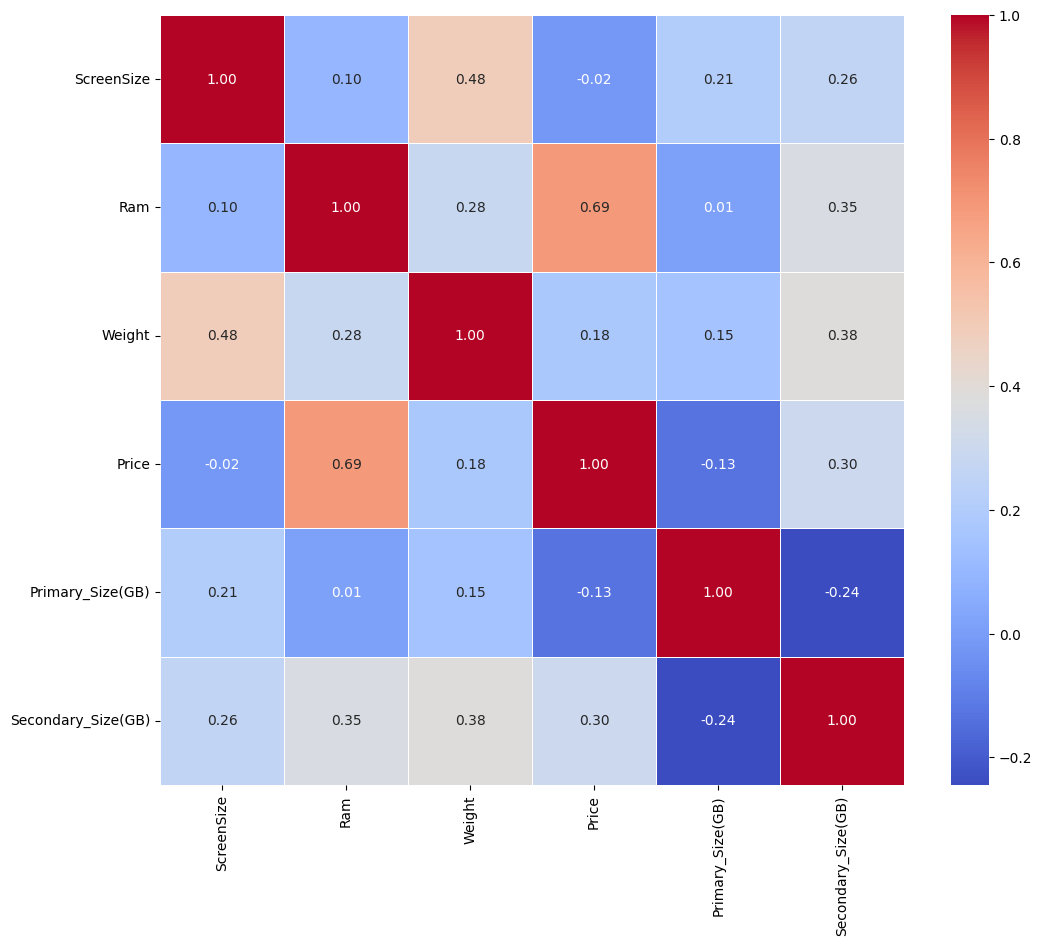

In [32]:
# Select only numeric columns
df_numeric = df.select_dtypes(include=["number"])
# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

Nothing seems to have a really high correlation to price except Ram seems to have noticable correlation otherwise all others seem quite low.
Weight and Resolution_Width and Resolution_Height seem to have next most noticable correlation

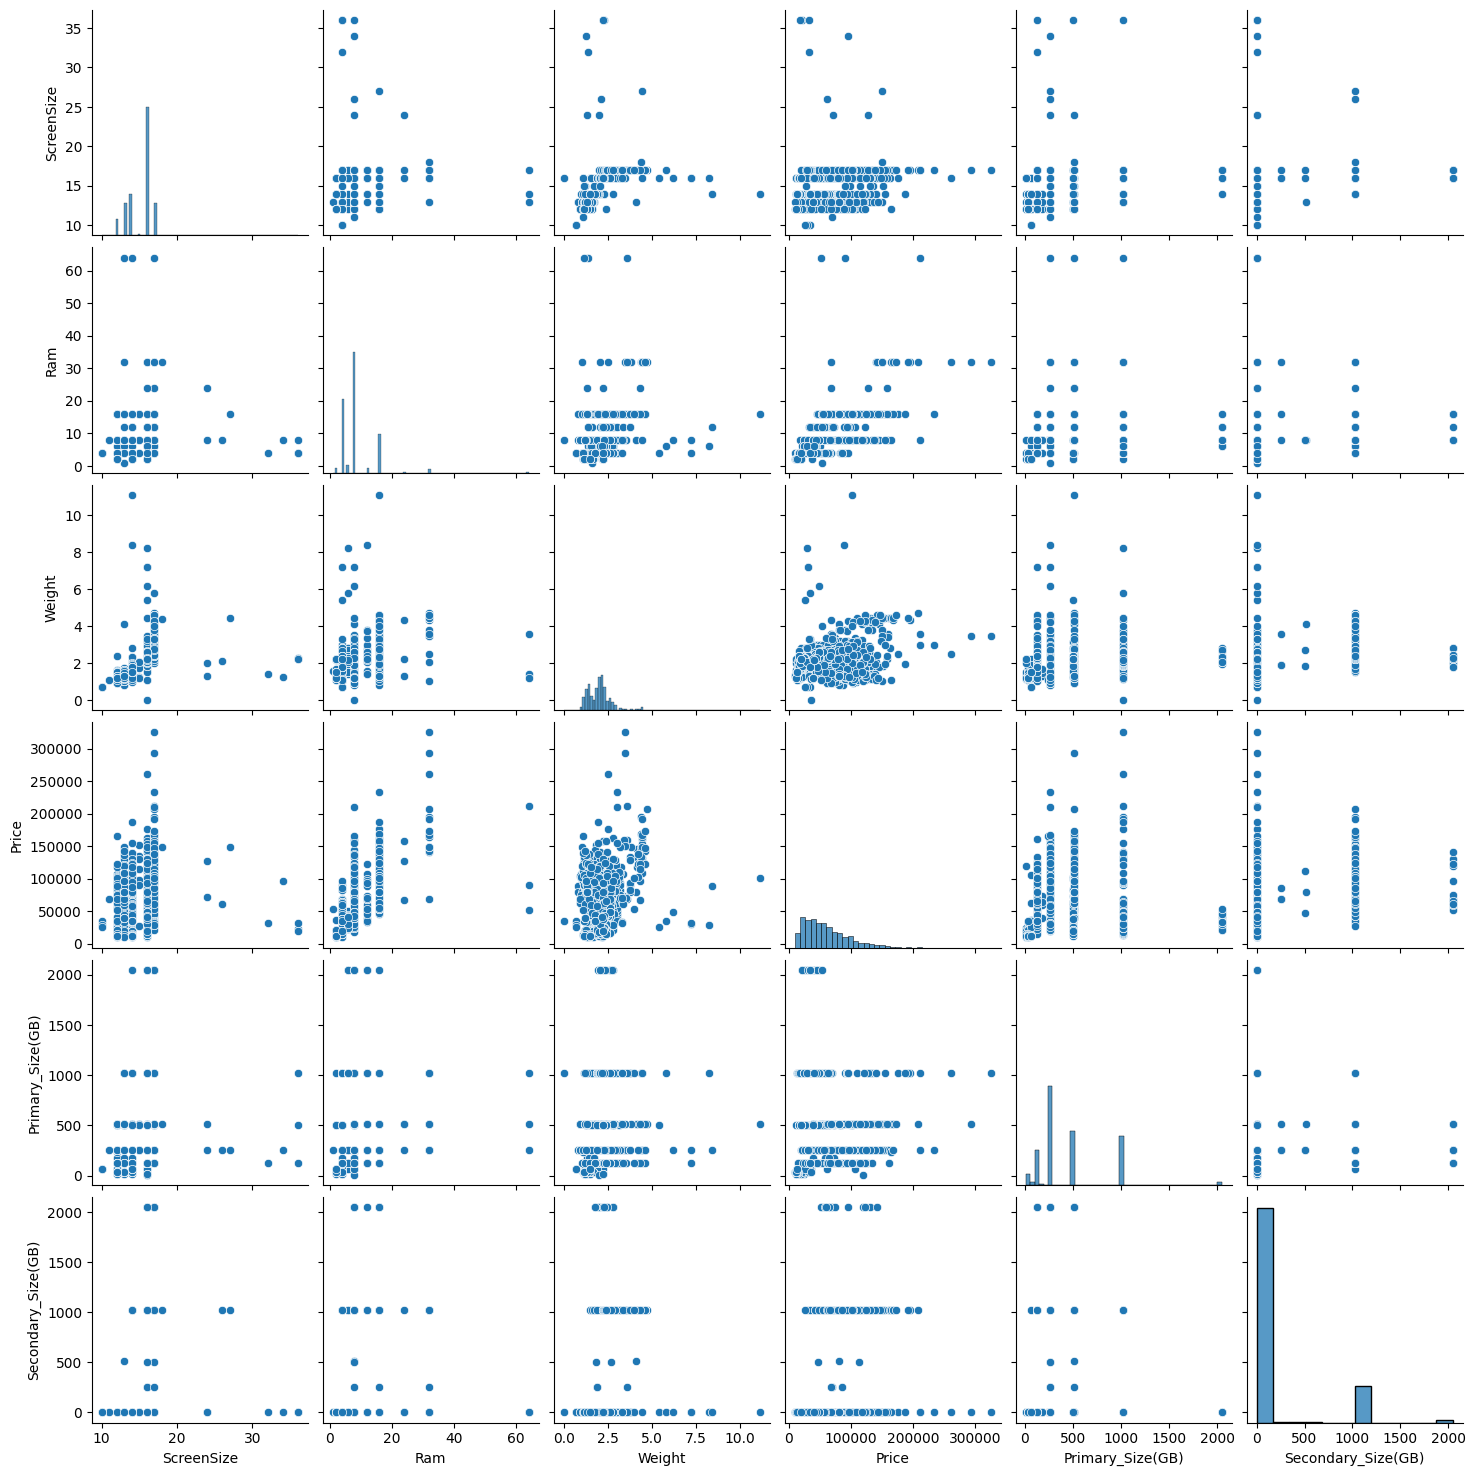

In [33]:
# pair plot to see everything at once
sns.pairplot(df_numeric)

# Nothing seems to correlate that well with price, this could be because of companies brand value or other possible factors like model name excetra

CPU frequency, Resolution_Width, Resolution_Height and maybe weight also seems to have some noticable correlation to price

In [34]:
"""# Create helper columns that are not directly
# connected to price but can help in the analysis
df['Ram_to_Weight'] = round(df['Ram'] / df['Weight'], 1)
df['Primary_Size(GB)_to_Weight'] = round(df['Primary_Size(GB)'] / df['Weight'], 1)
df['Cpu Frequency(GHz)_to_Weight'] =  round(df['Weight'] / df['CPU_Frequency(GHz)'], 1)
df['Cpu Frequency(GHz)_to_Weight'] =  round(df['CPU_Frequency(GHz)'] / df['Weight'], 1)
df['ScreenSize_to_Weight'] = round(df['ScreenSize'] / df['Weight'], 1)
df['Ram_to_ScreenSize'] = round(df['ScreenSize'] / df['Ram'], 1)
df['Ram_to_CPU_Frequency'] = round(df['CPU_Frequency(GHz)'] / df['Ram'], 1)
df['Primary_Storage(GB)_to_CPU_Frequency(GHz)'] = round(df['Primary_Size(GB)'] / df['CPU_Frequency(GHz)'], 1)
df['Primary_Size(GB)_to_Resolution_Width'] = round(df['Primary_Size(GB)'] / df['Resolution_Width'], 1)
df['Primary_Size(GB)_to_Resolution_Height'] = round(df['Primary_Size(GB)'] / df['Resolution_Height'], 1)"""

"""cols = [
    'Ram',
    'Weight',
    'Primary_Size(GB)',
    'CPU_Frequency(GHz)',
    'ScreenSize',
    'Resolution_Width',
    'Resolution_Height'
]

helper_columns = []

for numerator in cols:
    for denominator in cols:
        if numerator != denominator:
            new_col_name = f"{numerator}_to_{denominator}"
            df[new_col_name] = (df[numerator] / df[denominator]).round(1)
            helper_columns.append(new_col_name)

df[helper_columns] = df[helper_columns].dropna(axis=1, how='all')  # Drop columns with all NaN values"""

'cols = [\n    \'Ram\',\n    \'Weight\',\n    \'Primary_Size(GB)\',\n    \'CPU_Frequency(GHz)\',\n    \'ScreenSize\',\n    \'Resolution_Width\',\n    \'Resolution_Height\'\n]\n\nhelper_columns = []\n\nfor numerator in cols:\n    for denominator in cols:\n        if numerator != denominator:\n            new_col_name = f"{numerator}_to_{denominator}"\n            df[new_col_name] = (df[numerator] / df[denominator]).round(1)\n            helper_columns.append(new_col_name)\n\ndf[helper_columns] = df[helper_columns].dropna(axis=1, how=\'all\')  # Drop columns with all NaN values'

<Axes: >

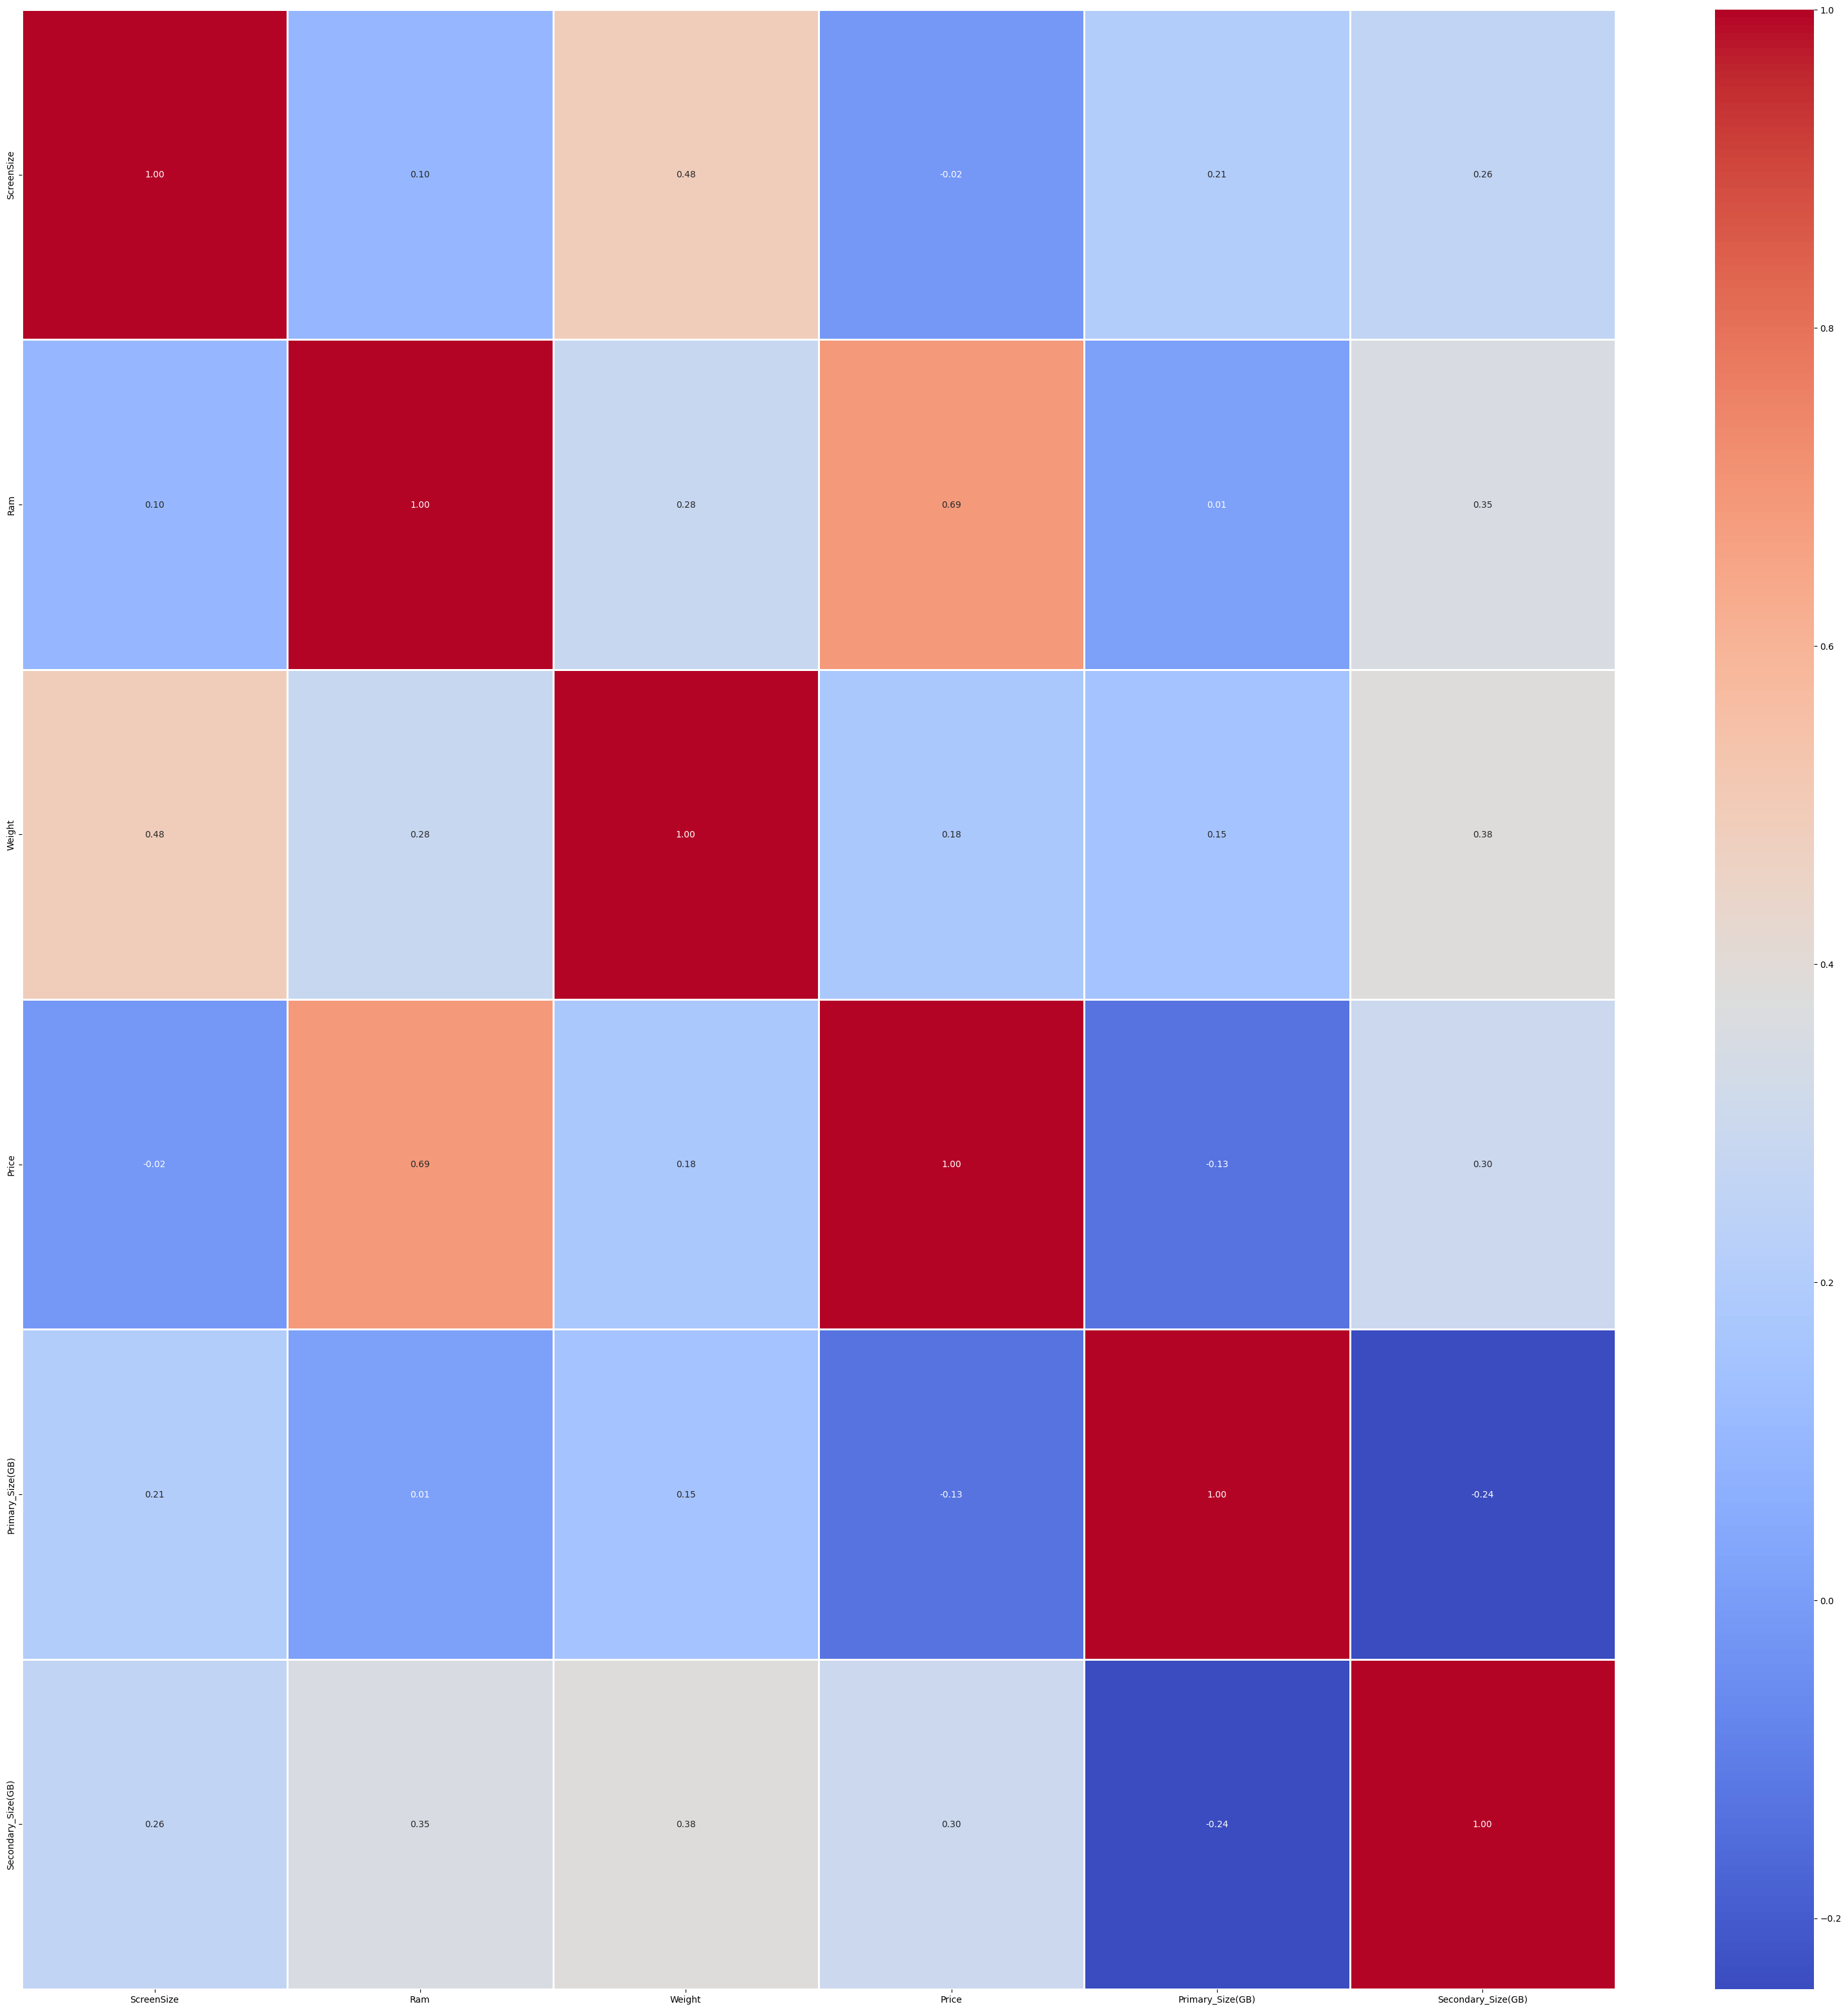

In [35]:
# Select only numeric columns
df_numeric = df.select_dtypes(include=["number"])
# Create a heatmap
plt.figure(figsize=(40, 40))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=1)

In [36]:
"""# Calculate the first 30th and 70 percentile of "Price column"
Q1 = df["Price"].quantile(0.22)
Q3 = df["Price"].quantile(0.78)
IQR = Q3 - Q1

# Define the lower and upper bound of the data to detect outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the DataFrame
df = df[(df["Price"] >= lower_bound) & (df["Price"] <= upper_bound)]"""

'# Calculate the first 30th and 70 percentile of "Price column"\nQ1 = df["Price"].quantile(0.22)\nQ3 = df["Price"].quantile(0.78)\nIQR = Q3 - Q1\n\n# Define the lower and upper bound of the data to detect outliers\nlower_bound = Q1 - 1.5 * IQR\nupper_bound = Q3 + 1.5 * IQR\n\n# Remove outliers from the DataFrame\ndf = df[(df["Price"] >= lower_bound) & (df["Price"] <= upper_bound)]'

This only had negative affect on the models accuracy

In [37]:
df

,Company,TypeName,ScreenSize,Cpu,Ram,Gpu,OpSys,Weight,Price,Primary_Storage,Secondary_Storage,Primary_Size(GB),Secondary_Size(GB),Panel_type
0,Apple,Ultrabook,13,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,71378,128GB SSD,No Secondary Storage,128,0,IPS Panel Retina Display
1,Apple,Ultrabook,13,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,47895,128GB Flash Storage,No Secondary Storage,128,0,Not Specified
2,HP,Notebook,16,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,30636,256GB SSD,No Secondary Storage,256,0,Full HD
3,Apple,Ultrabook,15,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,135195,512GB SSD,No Secondary Storage,512,0,IPS Panel Retina Display
4,Apple,Ultrabook,13,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,96095,256GB SSD,No Secondary Storage,256,0,IPS Panel Retina Display
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,Lenovo,2 in 1 Convertible,14,Intel Core i7 6500U 2.5GHz,4,Intel HD Graphics 520,Windows 10,1.80,33992,128GB SSD,No Secondary Storage,128,0,IPS Panel Full HD / Touchscreen
1269,Lenovo,2 in 1 Convertible,13,Intel Core i7 6500U 2.5GHz,16,Intel HD Graphics 520,Windows 10,1.30,79866,512GB SSD,No Secondary Storage,512,0,IPS Panel Quad HD+ / Touchscreen
1270,Lenovo,Notebook,14,Intel Celeron Dual Core N3050 1.6GHz,2,Intel HD Graphics,Windows 10,1.50,12201,64GB Flash Storage,No Secondary Storage,64,0,Not Specified
1271,HP,Notebook,16,Intel Core i7 6500U 2.5GHz,6,AMD Radeon R5 M330,Windows 10,2.19,40705,1TB HDD,No Secondary Storage,1024,0,Not Specified


<h3>Optimization for machine learning</h3>

In [38]:
# Get columns of the dataframe if needed for further analysis and optimization
df.columns

Index(['Company', 'TypeName', 'ScreenSize', 'Cpu', 'Ram', 'Gpu', 'OpSys',
       'Weight', 'Price', 'Primary_Storage', 'Secondary_Storage',
       'Primary_Size(GB)', 'Secondary_Size(GB)', 'Panel_type'],
      dtype='object')

In [39]:
df.head()

,Company,TypeName,ScreenSize,Cpu,Ram,Gpu,OpSys,Weight,Price,Primary_Storage,Secondary_Storage,Primary_Size(GB),Secondary_Size(GB),Panel_type
0,Apple,Ultrabook,13,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,71378,128GB SSD,No Secondary Storage,128,0,IPS Panel Retina Display
1,Apple,Ultrabook,13,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,47895,128GB Flash Storage,No Secondary Storage,128,0,Not Specified
2,HP,Notebook,16,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,30636,256GB SSD,No Secondary Storage,256,0,Full HD
3,Apple,Ultrabook,15,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,135195,512GB SSD,No Secondary Storage,512,0,IPS Panel Retina Display
4,Apple,Ultrabook,13,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,96095,256GB SSD,No Secondary Storage,256,0,IPS Panel Retina Display


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1270 entries, 0 to 1272
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             1270 non-null   object 
 1   TypeName            1270 non-null   object 
 2   ScreenSize          1270 non-null   int64  
 3   Cpu                 1270 non-null   object 
 4   Ram                 1270 non-null   int64  
 5   Gpu                 1270 non-null   object 
 6   OpSys               1270 non-null   object 
 7   Weight              1270 non-null   float64
 8   Price               1270 non-null   int64  
 9   Primary_Storage     1270 non-null   object 
 10  Secondary_Storage   1270 non-null   object 
 11  Primary_Size(GB)    1270 non-null   int64  
 12  Secondary_Size(GB)  1270 non-null   int64  
 13  Panel_type          1270 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 148.8+ KB


In [41]:
df.columns

Index(['Company', 'TypeName', 'ScreenSize', 'Cpu', 'Ram', 'Gpu', 'OpSys',
       'Weight', 'Price', 'Primary_Storage', 'Secondary_Storage',
       'Primary_Size(GB)', 'Secondary_Size(GB)', 'Panel_type'],
      dtype='object')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1270 entries, 0 to 1272
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             1270 non-null   object 
 1   TypeName            1270 non-null   object 
 2   ScreenSize          1270 non-null   int64  
 3   Cpu                 1270 non-null   object 
 4   Ram                 1270 non-null   int64  
 5   Gpu                 1270 non-null   object 
 6   OpSys               1270 non-null   object 
 7   Weight              1270 non-null   float64
 8   Price               1270 non-null   int64  
 9   Primary_Storage     1270 non-null   object 
 10  Secondary_Storage   1270 non-null   object 
 11  Primary_Size(GB)    1270 non-null   int64  
 12  Secondary_Size(GB)  1270 non-null   int64  
 13  Panel_type          1270 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 148.8+ KB


In [43]:
"""# this makes multiple columns with the variable (Separate for yes/no)
variables = ['Company', 'TypeName', 'ScreenSize', 'Ram', 'OpSys', 'Weight',
       'Primary_Storage', 'Secondary_Storage','Primary_Size(GB)',
       'Secondary_Size(GB)', 'Resolution_Width', 'Resolution_Height',
       'Panel_type', 'CPU_Brand', 'CPU_Model', 'CPU_Frequency(GHz)',
       'Gpu_Brand', 'Gpu_Model', 'Ram_to_Weight', 'Primary_Size(GB)_to_Weight',
       'Cpu Frequency(GHz)_to_Weight', 'ScreenSize_to_Weight',
       'Ram_to_ScreenSize', 'ScreenSize_to_Resolution_Width',
       'Ram_to_Resolution_Width', 'Primary_Storage(GB)_to_CPU_Frequency(GHz)',
       'Primary_Size(GB)_to_Resolution_Width']

# use encoder
encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
one_hot_encoded = encoder.fit_transform(df[variables]).astype(int)
df = pd.concat([df,one_hot_encoded],axis=1).drop(columns=variables)"""

'# this makes multiple columns with the variable (Separate for yes/no)\nvariables = [\'Company\', \'TypeName\', \'ScreenSize\', \'Ram\', \'OpSys\', \'Weight\',\n       \'Primary_Storage\', \'Secondary_Storage\',\'Primary_Size(GB)\',\n       \'Secondary_Size(GB)\', \'Resolution_Width\', \'Resolution_Height\',\n       \'Panel_type\', \'CPU_Brand\', \'CPU_Model\', \'CPU_Frequency(GHz)\',\n       \'Gpu_Brand\', \'Gpu_Model\', \'Ram_to_Weight\', \'Primary_Size(GB)_to_Weight\',\n       \'Cpu Frequency(GHz)_to_Weight\', \'ScreenSize_to_Weight\',\n       \'Ram_to_ScreenSize\', \'ScreenSize_to_Resolution_Width\',\n       \'Ram_to_Resolution_Width\', \'Primary_Storage(GB)_to_CPU_Frequency(GHz)\',\n       \'Primary_Size(GB)_to_Resolution_Width\']\n\n# use encoder\nencoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")\none_hot_encoded = encoder.fit_transform(df[variables]).astype(int)\ndf = pd.concat([df,one_hot_encoded],axis=1).drop(columns=variables)'

In [44]:
df

,Company,TypeName,ScreenSize,Cpu,Ram,Gpu,OpSys,Weight,Price,Primary_Storage,Secondary_Storage,Primary_Size(GB),Secondary_Size(GB),Panel_type
0,Apple,Ultrabook,13,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,71378,128GB SSD,No Secondary Storage,128,0,IPS Panel Retina Display
1,Apple,Ultrabook,13,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,47895,128GB Flash Storage,No Secondary Storage,128,0,Not Specified
2,HP,Notebook,16,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,30636,256GB SSD,No Secondary Storage,256,0,Full HD
3,Apple,Ultrabook,15,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,135195,512GB SSD,No Secondary Storage,512,0,IPS Panel Retina Display
4,Apple,Ultrabook,13,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,96095,256GB SSD,No Secondary Storage,256,0,IPS Panel Retina Display
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,Lenovo,2 in 1 Convertible,14,Intel Core i7 6500U 2.5GHz,4,Intel HD Graphics 520,Windows 10,1.80,33992,128GB SSD,No Secondary Storage,128,0,IPS Panel Full HD / Touchscreen
1269,Lenovo,2 in 1 Convertible,13,Intel Core i7 6500U 2.5GHz,16,Intel HD Graphics 520,Windows 10,1.30,79866,512GB SSD,No Secondary Storage,512,0,IPS Panel Quad HD+ / Touchscreen
1270,Lenovo,Notebook,14,Intel Celeron Dual Core N3050 1.6GHz,2,Intel HD Graphics,Windows 10,1.50,12201,64GB Flash Storage,No Secondary Storage,64,0,Not Specified
1271,HP,Notebook,16,Intel Core i7 6500U 2.5GHz,6,AMD Radeon R5 M330,Windows 10,2.19,40705,1TB HDD,No Secondary Storage,1024,0,Not Specified


In [45]:
# List of all boolean variables we want to convert
variables = ['Company', 'TypeName', 'Cpu',
       'Gpu', 'OpSys', 'Primary_Storage', 'Secondary_Storage',
       'Panel_type']

# use encoder
encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
one_hot_encoded = encoder.fit_transform(df[variables]).astype(int)
df = pd.concat([df,one_hot_encoded],axis=1).drop(columns=variables)

In [46]:
# Create variables, which we are trying to predict, ->
# for the other variable drop the column that we are trying to predict
# for the other variable keep the column that we are trying to predict
X = df.drop(columns=["Price"], axis=1)
y = df["Price"]

In [47]:
# Create trainsplit with sample size 0.3 this means 70% of the data ->
# will be used for training and other 30% for testing
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [48]:
 # initialize the scaler and process X-values
# IN MOST CASES you can experiment with MinMaxScaler 
# and StandardScaler, ONLY USE ONE SCALER AT A TIME
sc = StandardScaler()
# use fit_transform only once in the beginning
# and use transform after that everywhere
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import svm
from scipy.stats import uniform
from sklearn.calibration import CalibratedClassifierCV

# initialize testable parameters
# Since we have to wrap LinearSVC into CalibratedClassifierCV
# we have to use this estimator__ prefix in the parameters
param_dist = {
    'estimator__C': [0.75, 0.85, 0.9, 1, 1.25, 1.35, 1.45, 1.5],
    'estimator__loss': ['hinge', 'square_hinge'],
    'estimator__tol': [0.001, 0.0001, 0.002, 0.0025, 0.00125]
}

# start finding the optimal parameters with RandomizedSearchCV!
# RandomizedSearchCV is usually way faster than GridSearchCV
# .... but it's also mostly random
test_model = RandomizedSearchCV(CalibratedClassifierCV(svm.LinearSVC()), param_dist, n_iter=300, verbose=3, n_jobs=-1, cv=5, random_state=42)
test_model.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


RandomizedSearchCV(cv=5,
                   estimator=CalibratedClassifierCV(estimator=LinearSVC()),
                   n_iter=300, n_jobs=-1,
                   param_distributions={'estimator__C': [0.75, 0.85, 0.9, 1,
                                                         1.25, 1.35, 1.45,
                                                         1.5],
                                        'estimator__loss': ['hinge',
                                                            'square_hinge'],
                                        'estimator__tol': [0.001, 0.0001, 0.002,
                                                           0.0025, 0.00125]},
                   random_state=42, verbose=3)

In [50]:
test_model.best_params_

{'estimator__tol': 0.00125, 'estimator__loss': 'hinge', 'estimator__C': 0.85}

In [54]:
# Get the test predictions of the data into a variable ->
# which we will want to use to compare with the actual values
predictions = test_model.predict(X_test)

In [59]:
# code as usual
model = CalibratedClassifierCV(svm.LinearSVC(C=0.85, tol=0.00125, loss='hinge'))
model.fit(X_train, y_train)

CalibratedClassifierCV(estimator=LinearSVC(C=0.75, tol=0.001))

In [60]:
# Get the test predictions of the data into a variable ->
# which we will want to use to compare with the actual values
predictions = test_model.predict(X_test)

In [61]:
 # print the classification report based on true values and predictions
print(classification_report(y_test, predictions))

# get overall accuracy of the model and print it
acc = accuracy_score(y_test, predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

              precision    recall  f1-score   support

        9270       0.00      0.00      0.00         1
       10602       0.00      0.00      0.00         1
       11135       0.00      0.00      0.00         0
       13053       0.00      0.00      0.00         1
       13266       0.00      0.00      0.00         0
       13852       0.00      0.00      0.00         1
       14332       0.00      0.00      0.00         1
       14652       0.00      0.00      0.00         1
       15397       1.00      1.00      1.00         1
       15877       0.00      0.00      0.00         1
       15930       0.00      0.00      0.00         1
       16463       0.00      0.00      0.00         1
       16943       0.00      0.00      0.00         1
       17529       0.00      0.00      0.00         1
       17742       0.00      0.00      0.00         1
       18115       0.00      0.00      0.00         1
       18434       0.00      0.00      0.00         1
       18594       0.00    

<Axes: >

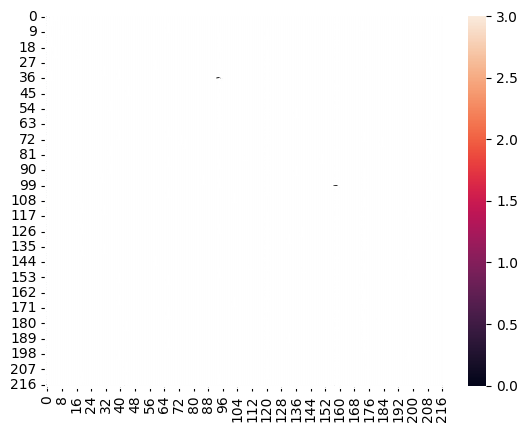

In [62]:
# if you want a more graphical version of this, try:
# the fmt-parameter will change to decimal format from scientific format
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='g')

In [63]:
# basically 0.5 means, there's still something to optimize
# if this falls under 0.5, random guessing works better than this model
roc_auc_score(y, test_model.predict(X.values))

ValueError: multi_class must be in ('ovo', 'ovr')

In [ ]:
sns.distplot((y_test - predictions))
plt.show()
plt.close()

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, predictions, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line y=x
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Predicted vs Actual values')
plt.grid(True)
plt.show()

In [ ]:
# Create variable tester row to test the model with a random row from the DataFrame
tester_row = df.sample(n=1)
print(f"Index: {tester_row.index[0]}")
print(tester_row)

In [ ]:
# Create variables, which we are trying to predict, ->
# for the other variable drop the column that we are trying to predict
# for the other variable keep the column that we are trying to predict
X_tester_row = tester_row.drop(columns=["Price"])
y_tester_row = tester_row["Price"]

In [ ]:
# Make predictions with the model using the tester row
y_pred_tester = test_model.predict(X_tester_row)

In [ ]:
# Get the result of the prediction
result = test_model.predict(X_tester_row)[0]

# Display the predicted price for the tester row
print()
print(f"Predicted computers price with given parameters:")
print(f"{round(float(result), 2)} $")
print("----------------")

In [ ]:
# Get the price of the tester row to compare with the predicted price
row = df.loc[tester_row.index[0]]

# Display the actual price of the tester row
row["Price"]

In [ ]:
# Calculate the precision of the model by comparing the predicted price with the actual price
precision = result/row["Price"]

# Display the precision of the model by percentages
precision

In [ ]:
# Calculate how much the model is off by $
precision_in_money = round(row["Price"] - result, 2)

# Display how much the model was off by $
precision_in_money